<a href="https://colab.research.google.com/github/akshatagnihotri/Face-Mask-Detection-project/blob/main/Face_Mask_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:01<00:00, 117MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [ ]:
from zipfile import ZipFile


In [ ]:
import os
os.listdir(path)

['data']

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
from zipfile import ZipFile
zip_path='/content/drive/MyDrive/zip/archive.zip'
extract_path='/content/my_folder1'
with ZipFile(zip_path,'r') as zip:
  zip.extractall(extract_path)

In [ ]:
os.listdir(extract_path)

['data']

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import PIL
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
os.listdir()

['.config',
 'drive',
 'WhatsApp Image 2025-02-15 at 17.47.08_92b1cab9.jpg',
 'my_folder1',
 'sample_data']

In [ ]:
mask_data=os.listdir('/content/my_folder1/data/with_mask')
no_mask_data=os.listdir('/content/my_folder1/data/without_mask')

In [ ]:
mask_data[0:5]

['with_mask_2275.jpg',
 'with_mask_1446.jpg',
 'with_mask_658.jpg',
 'with_mask_1323.jpg',
 'with_mask_3347.jpg']

In [ ]:
mask_data[:-5:-1]

['with_mask_2223.jpg',
 'with_mask_2829.jpg',
 'with_mask_1766.jpg',
 'with_mask_378.jpg']

In [ ]:
#creating labels for mask and without
mask_labels=[1]*len(mask_data)
no_mask_labels=[0]*len(no_mask_data)

In [ ]:
Target=mask_labels+no_mask_labels
len(Target)

7553

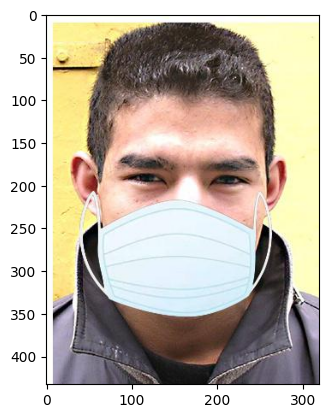

In [ ]:
img=mpimg.imread('/content/my_folder1/data/with_mask/with_mask_994.jpg')
imgplot =plt.imshow(img)
plt.show()

In [ ]:
#converting mask images to np array
mask_images=[]
for i in mask_data:
  image=cv2.imread('/content/my_folder1/data/with_mask/'+i)
  image_from_array=Image.fromarray(image,'RGB')
  size_image=image_from_array.resize((128,128))
  mask_images.append(np.array(size_image))


In [ ]:
print(mask_images[0].shape)

(128, 128, 3)


In [ ]:
#converting no mask images to np array
no_mask_images=[]
for i in no_mask_data:
  image=cv2.imread('/content/my_folder1/data/without_mask/'+i)
  image_from_array=Image.fromarray(image,'RGB')
  size_image=image_from_array.resize((128,128))
  no_mask_images.append(np.array(size_image))




In [ ]:
print(no_mask_images[0].shape)

(128, 128, 3)


In [ ]:
#train and split
x=np.array(mask_images+no_mask_images)
y=np.array(Target)

In [ ]:
import numpy as np
import cv2
from PIL import Image

# ... (your existing code to load mask_data and no_mask_data) ...

#converting mask images to np array
mask_images=[]
for i in mask_data:
  try:
    image=cv2.imread('/content/my_folder1/data/with_mask/'+i)
    # Check if image is read correctly
    if image is not None:
      image_from_array=Image.fromarray(image,'RGB')
      size_image=image_from_array.resize((128,128))
      mask_images.append(np.array(size_image))
    else:
      print(f"Could not read image: /content/my_folder1/data/with_mask/{i}")
  except Exception as e:
    print(f"Error processing image: /content/my_folder1/data/with_mask/{i}, Error: {e}")


#converting no mask images to np array
no_mask_images=[]
for i in no_mask_data:
  try:
    image=cv2.imread('/content/my_folder1/data/without_mask/'+i)
    # Check if image is read correctly
    if image is not None:
      image_from_array=Image.fromarray(image,'RGB')
      size_image=image_from_array.resize((128,128))
      no_mask_images.append(np.array(size_image))
    else:
      print(f"Could not read image: /content/my_folder1/data/without_mask/{i}")
  except Exception as e:
    print(f"Error processing image: /content/my_folder1/data/without_mask/{i}, Error: {e}")

#train and split
x=np.array(mask_images+no_mask_images)
y=np.array(Target)

In [ ]:
#show x shape
print(x.shape)

(7553, 128, 128, 3)


In [ ]:
print (y.shape)

(7553,)


In [ ]:
#now do train the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#predict



In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3), (6042,), (1511,))

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers  import Dense

In [ ]:
model = Sequential()


In [ ]:
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape=(128,128,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [ ]:






model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'))

In [ ]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:



model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
x_train_scaled.shape,y_train.shape

((6042, 128, 128, 3), (6042,))

In [ ]:
history = model.fit(x_train_scaled, y_train)

189/189 ━━━━━━━━━━━━━━━━━━━━ 152s 793ms/step - accuracy: 0.7403 - loss: 0.5485


In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.8974 - loss: 0.2697


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
model.save("cnn_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("cnn_model.h5")  # Load the model


Enter the image path: /content/20250210_165314.jpg


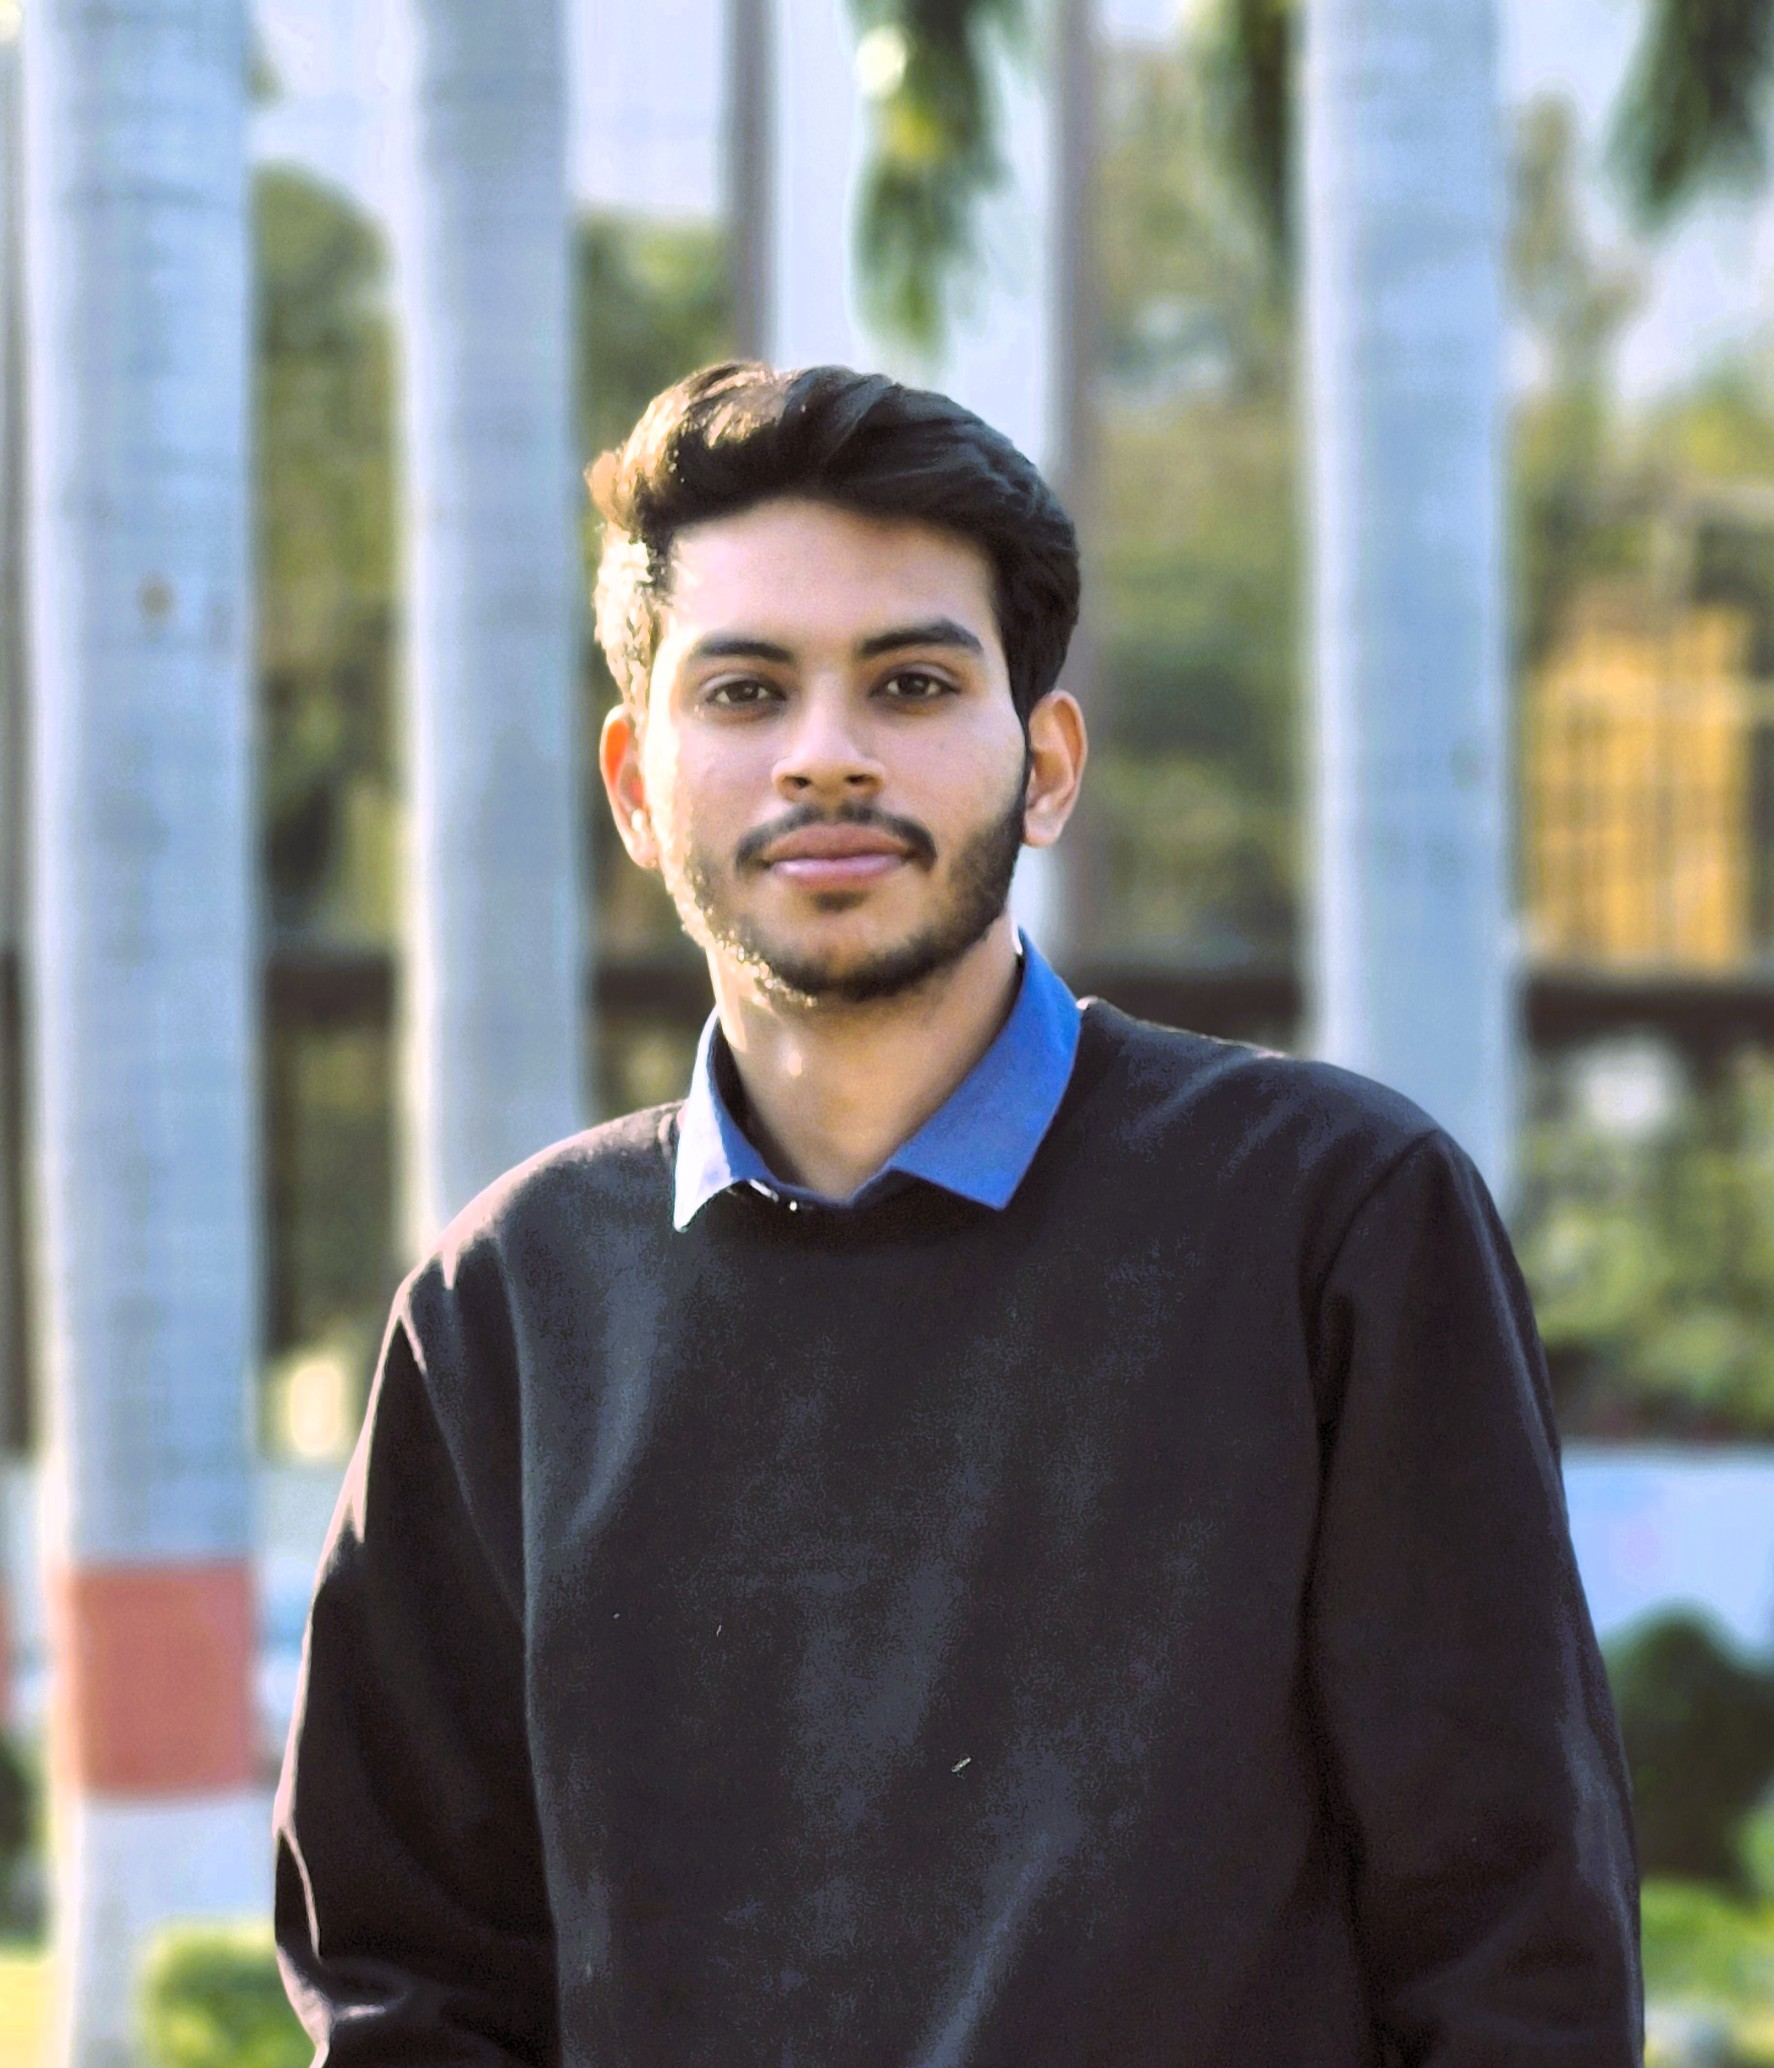

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Raw Prediction Output: [[0.8319672]]
The person in the image is NOT wearing a mask ❌


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

model = load_model("cnn_model.h5")

def predict_mask(image_path):
    """
    Predicts whether a person in the given image is wearing a mask or not.

    Args:
        image_path (str): Path to the image file.

    Returns:
        None (Prints the prediction result)
    """
    input_image = cv2.imread(image_path)


    if input_image is None:
        print("Error: Unable to load image. Check the path and try again.")
        return


    cv2_imshow(input_image)


    input_image_resized = cv2.resize(input_image, (128, 128))

    input_image_scaled = input_image_resized / 255.0

    # Reshape to match model input
    input_image_reshaped = np.expand_dims(input_image_scaled, axis=0)

    input_prediction = model.predict(input_image_reshaped)
    print("Raw Prediction Output:", input_prediction)

    input_pred_label = np.argmax(input_prediction)
    if input_pred_label == 1:
        print("The person in the image is wearing a mask 😷")
    else:
        print("The person in the image is NOT wearing a mask ❌")

# Example Usage
image_path = input("Enter the image path: ")
predict_mask(image_path)
